# 1
## 1.1

In [111]:
import torch
from torch.utils.data import Dataset, DataLoader

In [112]:
import numpy as np
def sample_data():
    count = 10000
    rand = np.random.RandomState(0)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

def sample_validation():
    count = 2000
    rand = np.random.RandomState(8888)
    a = 0.3 + 0.1 * rand.randn(count)
    b = 0.8 + 0.05 * rand.randn(count)
    mask = rand.rand(count) < 0.5
    samples = np.clip(a * mask + b * (1 - mask), 0.0, 1.0)
    return np.digitize(samples, np.linspace(0.0, 1.0, 100))

In [113]:
dataset = sample_data()
X_train, test = torch.tensor(dataset[:8000]), torch.tensor(dataset[8000:])
validation = torch.tensor(sample_validation())

In [114]:
from torch.nn import functional as F

class SoftmaxModel(torch.nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.num_labels = num_labels
        self.thetas = torch.zeros(num_labels, requires_grad=True)

    def forward(self):
        return F.log_softmax(self.thetas, dim=0)

    def parameters(self):
        return [self.thetas]

In [147]:
model = SoftmaxModel(100)

def train(batch_size, num_epochs):
    loss_function = torch.nn.NLLLoss(reduction='mean')
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    trainLoader = DataLoader(X_train, batch_size=batch_size)
    num_batches = len(trainLoader)
    step = 0
    valLoss = []
    xVal = []
    trainLoss = []
    xTrain = []
    for epoch in range(num_epochs):
        for i, batch in enumerate(trainLoader):
            step += 1
            probs = model()
            probs = probs.repeat(batch.size()[0], 1)
            loss = loss_function(probs, batch)
            trainLoss.append(np.log2(float(loss)))
            xTrain.append(step)
            loss.backward()
            optimizer.step()
            model.zero_grad()
            with torch.no_grad():
                probs = model()
                probs = probs.repeat(validation.size()[0], 1)
                loss = loss_function(probs, validation)
                xVal.append(step)
                valLoss.append(np.log2(float(loss)))
    return valLoss, xVal, trainLoss, xTrain

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


def plotLosses(valLoss, xVal, trainLoss, trainVal):
    fig, ax = plt.subplots()
    ax.plot(trainVal, trainLoss, label='train')
    ax.plot(xVal, valLoss, label='validation')
    plt.legend()
    plt.show()


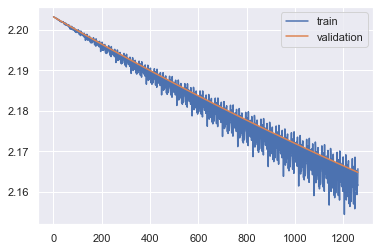

In [149]:
plotLosses(*train(128, 20))

## 1.2

In [124]:
def plotDist(p, title):
    fig, ax = plt.subplots()
    ax.set(xlabel='x', ylabel='p',title=title)
    ax.bar(np.arange(100), p)
    plt.show()

In [137]:
def sampleModel():
    probs = model().exp().detach().numpy()
    sample = np.zeros(100)
    for i in np.random.choice(100, 1000, p=probs):
        sample[i] += 1
    return sample / 1000

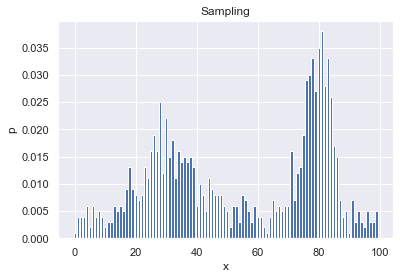

In [138]:
plotDist(sampleModel(), 'Sampling')

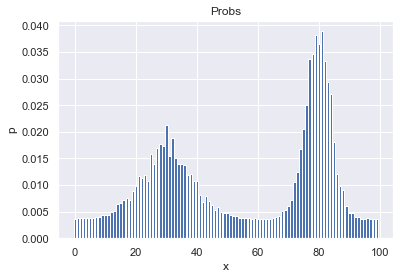

In [139]:
plotDist(model().exp().detach().numpy(), 'Probs')

In [140]:
def sampleData():
    sample = np.zeros(100)
    for i in dataset:
        sample[i] += 1
    return sample / 1000

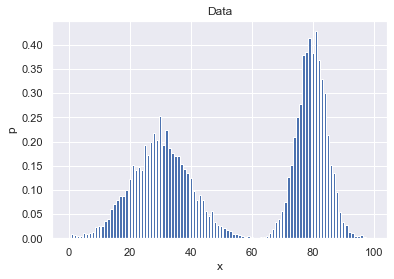

In [141]:
plotDist(sampleData(), 'Data')

As we can see there is two spikes coming from a and b from data distribution with spike in b being more precise due to less deviation ( $0.05$ compare $0.1$). Probabilities bar plot is more smooth than sampling as expected. We also see that there are gaps between points a and in data distribution because our distribution cannot reach some of the numbers, yet model still has probability for these zero mass points.

# 2

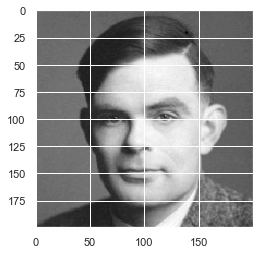

In [143]:
distribution = np.load('../distribution.npy')
plt.imshow(distribution, cmap='gray')
#TODO

## 3

In [151]:
import pickle

with open('../mnist-hw1.pkl', 'rb') as f:
    mnist = pickle.load(f)
print(mnist)
#TODO

{'train': array([[[[3, 2, 2],
         [3, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 2],
         [3, 2, 2],
         [3, 2, 2]],

        [[3, 2, 2],
         [3, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 2],
         [3, 2, 2],
         [3, 2, 2]],

        [[2, 2, 2],
         [2, 2, 2],
         [3, 2, 3],
         ...,
         [3, 2, 2],
         [3, 2, 2],
         [3, 2, 2]],

        ...,

        [[3, 2, 2],
         [3, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 3],
         [3, 2, 3],
         [3, 2, 3]],

        [[2, 2, 2],
         [2, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 2],
         [3, 2, 3],
         [3, 2, 3]],

        [[2, 2, 2],
         [2, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 2],
         [3, 2, 2],
         [3, 2, 2]]],


       [[[3, 2, 2],
         [3, 2, 2],
         [3, 2, 2],
         ...,
         [3, 2, 3],
         [3, 2, 3],
         [3, 2, 3]],

        [[3, 2, 2],
  